In [1]:
from datetime import datetime
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from vnstock3 import Vnstock
import pandas_ta as ta
import numpy as np
import F
from prophet import Prophet

D:\DSP\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
now = datetime.now()
current_date = now.strftime("%Y-%m-%d")
vn30 = Vnstock().stock(symbol='VN30', source='VCI')
df_vn30 = vn30.quote.history(start='2022-01-01', end = current_date, to_df=True)

vni = Vnstock().stock(symbol='VNINDEX', source='VCI')
df_vni = vni.quote.history(start='2022-01-01', end = current_date, to_df=True)

2024-06-29 14:00:35,548 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-06-29 14:00:35,863 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [3]:
def model_Prophet(data):
    data = data[['time', 'close']].copy()
    data.rename(columns={'time': 'ds', 'close': 'y'}, inplace=True)
    model = Prophet()
    model.fit(data)
    return model

def output_Prophet(data, k):
    data_features = data[['time', 'close']].copy()
    data_features.dropna(inplace=True)
    
    if data_features.isnull().values.any():
        raise ValueError("Train data contains NaN values.")
    
    model = model_Prophet(data_features)
    future = model.make_future_dataframe(periods=1)
    forecast = model.predict(future)
    
    # Get the predicted price (yhat) for the last row
    predicted_price = forecast['yhat'].tail(2).mean()

    
    return predicted_price

In [4]:
def test(data, k):
    # Ensure the 'Price' column is properly referenced
    data_output = data[['time', 'close']].copy()
    data_output['position'] = 0

    # Calculate predicted price for each row starting from index k
    for i in range(k, len(data)):
        # Get data for the previous k days to predict the price for the current day
        historical_data = data.iloc[i-k:i][['time', 'close']]
        
        # Get predicted price
        predicted_price = output_Prophet(historical_data, k)
        
        # Calculate the price difference between the last day in the prediction data and the predicted price
        price_difference = predicted_price - data.iloc[i-1]['close']
        
        # Update position based on calculated price difference
        if price_difference > 5:
            data_output.loc[i, 'position'] = 1
        elif price_difference < -5:
            data_output.loc[i, 'position'] = -1
    
    data_output.dropna(inplace=True)
    return data_output

In [5]:
%%capture
data_VN30_position = test(df_vn30, 10)
data_VNI_position = test(df_vni , 10)

Margin: -0.7984602269022562
MDD: (319.39708737864066, 0.20600150108912235)

   Total trading quantity: 156
         Profit per trade: -0.19288461538460902
             Total Profit: -30.1
         Profit after fee: -101.2
 Trading quantity per day: 0.2524271844660194
 Profit per day after fee: -0.16375404530744336
                   Return: -0.026266700577718082
          Profit per year: -40.725468577728776
                  HitRate: 0.4935897435897436
          HitRate per day: 0.2106969205834684


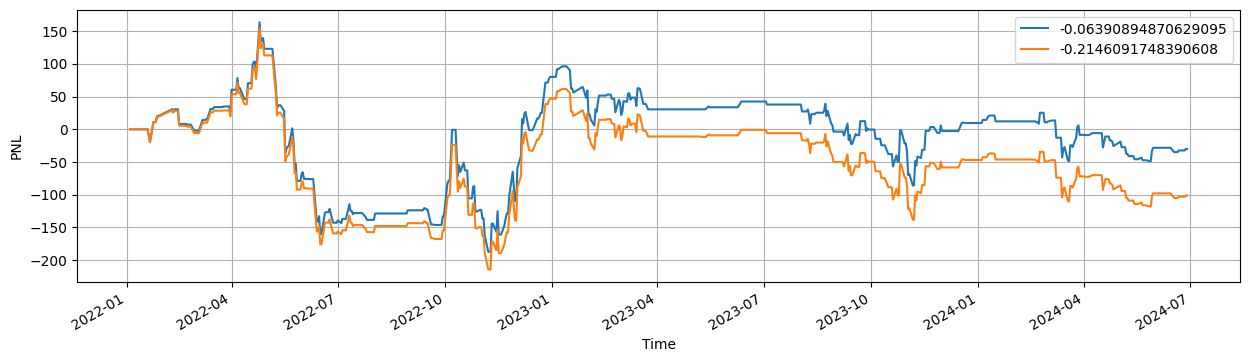

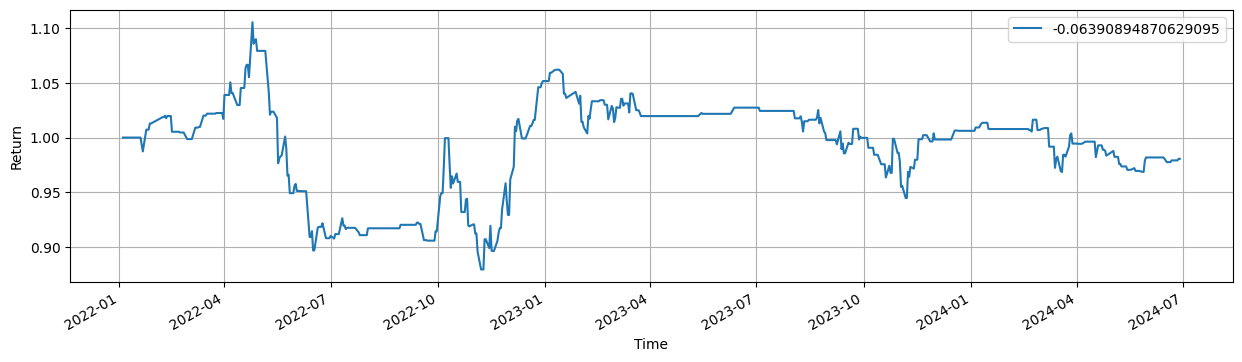

In [6]:
backtesting = F.BacktestInformation(data_VN30_position['time'], data_VN30_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()

Margin: -3.437519118256026
MDD: (466.109773462783, 0.30606722270850545)

   Total trading quantity: 143
         Profit per trade: -0.8216083916083948
             Total Profit: -117.5
         Profit after fee: -182.0
 Trading quantity per day: 0.2313915857605178
 Profit per day after fee: -0.29449838187702265
                   Return: -0.04809341082625175
          Profit per year: -73.2414553472988
                  HitRate: 0.48951048951048953
          HitRate per day: 0.18314424635332252


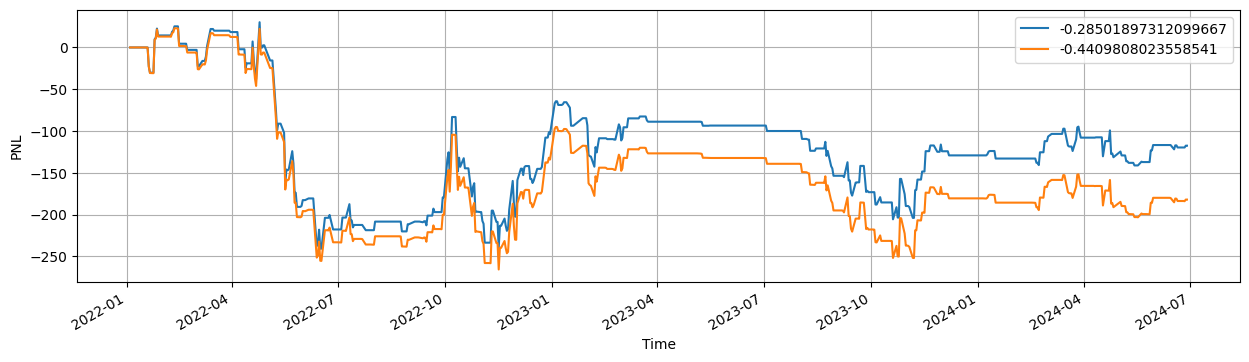

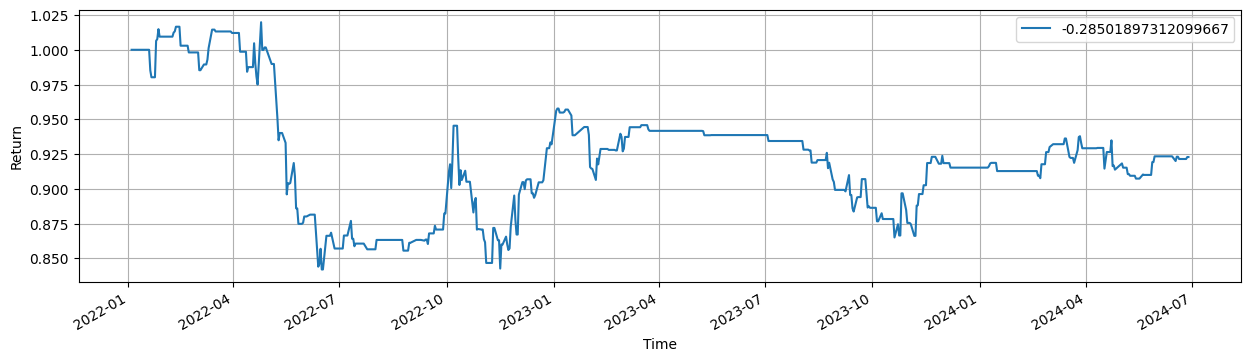

In [7]:
backtesting = F.BacktestInformation(data_VNI_position['time'], data_VNI_position['position'], data_VNI_position['close'])
backtest = backtesting.Plot_PNL()

In [8]:
%%capture
data_VN30_position = test(df_vn30, 15)
data_VNI_position = test(df_vni , 15)

Margin: -1.1446330883920854
MDD: (314.50875404530694, 0.2038994301641568)

   Total trading quantity: 217
         Profit per trade: -0.27442396313363615
             Total Profit: -59.5
         Profit after fee: -162.9
 Trading quantity per day: 0.3511326860841424
 Profit per day after fee: -0.26359223300970874
                   Return: -0.04250009840815104
          Profit per year: -65.55512679162074
                  HitRate: 0.4608294930875576
          HitRate per day: 0.2771474878444084


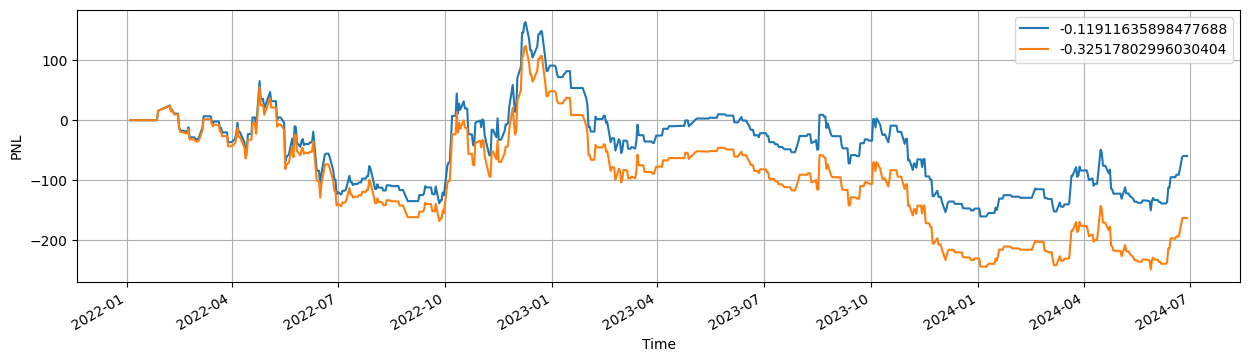

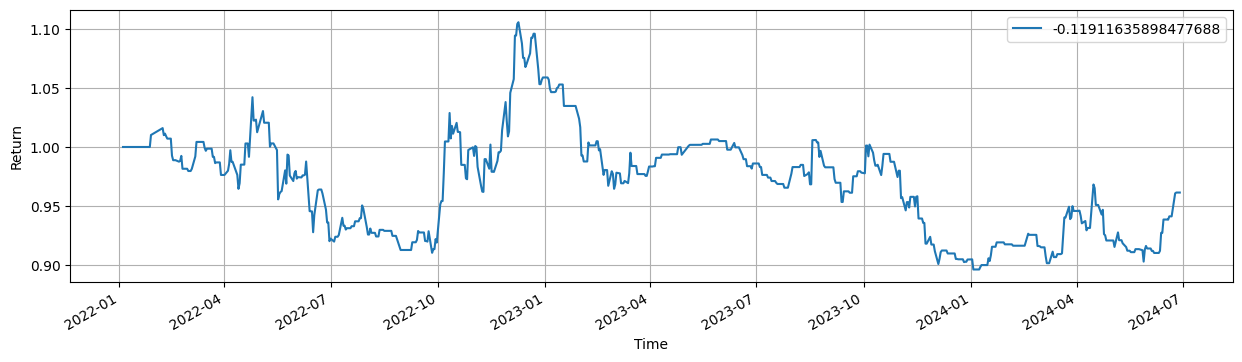

In [9]:
backtesting = F.BacktestInformation(data_VN30_position['time'], data_VN30_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()

Margin: -3.149457107787778
MDD: (277.51920711974185, 0.1787632418127218)

   Total trading quantity: 211
         Profit per trade: -0.7556398104265352
             Total Profit: -159.4
         Profit after fee: -259.5
 Trading quantity per day: 0.3414239482200647
 Profit per day after fee: -0.4199029126213592
                   Return: -0.06726793802448112
          Profit per year: -104.42943770672548
                  HitRate: 0.4549763033175355
          HitRate per day: 0.27228525121555913


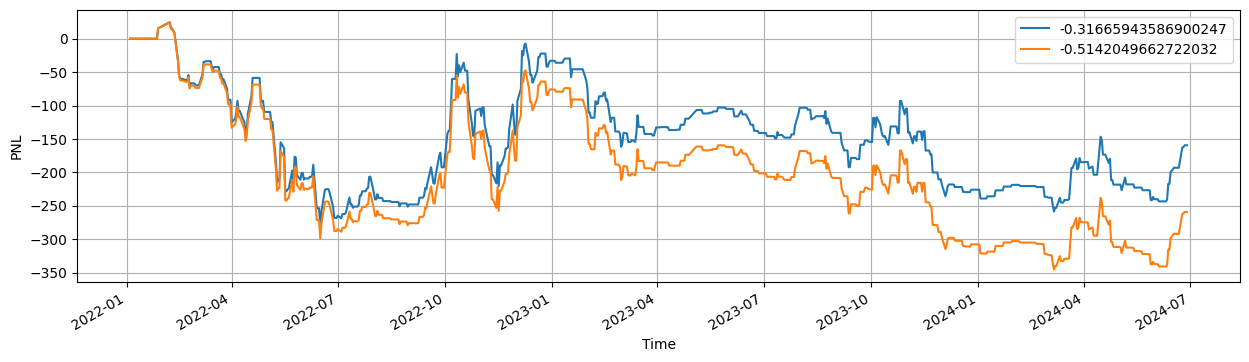

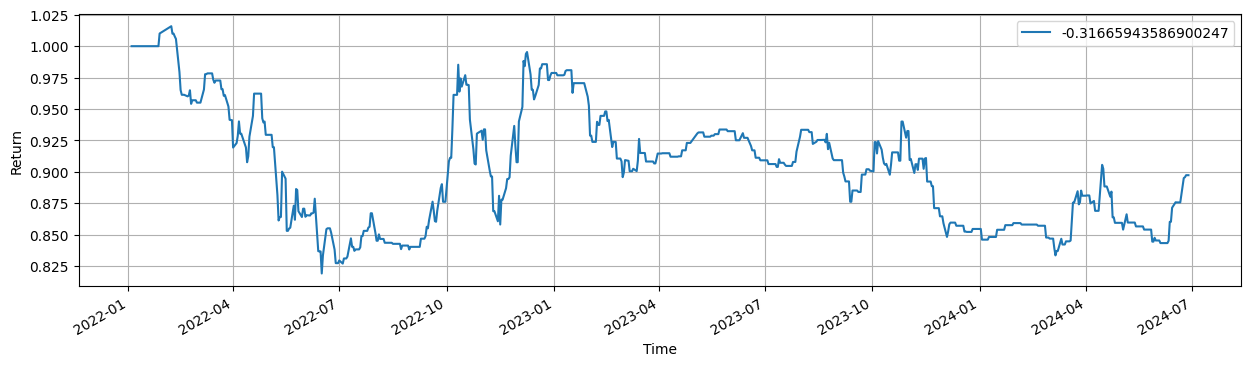

In [10]:
backtesting = F.BacktestInformation(data_VNI_position['time'], data_VNI_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()

In [11]:
%%capture
data_VN30_position = test(df_vn30, 7)
data_VNI_position = test(df_vni , 7)

Margin: 7.016052795682017
MDD: (269.2006796116499, 0.1748964914316852)

   Total trading quantity: 142
         Profit per trade: 1.7138028169014206
             Total Profit: 243.4
         Profit after fee: 179.4
 Trading quantity per day: 0.2297734627831715
 Profit per day after fee: 0.2902912621359223
                   Return: 0.04690433266783873
          Profit per year: 72.19514884233737
                  HitRate: 0.49295774647887325
          HitRate per day: 0.18638573743922204


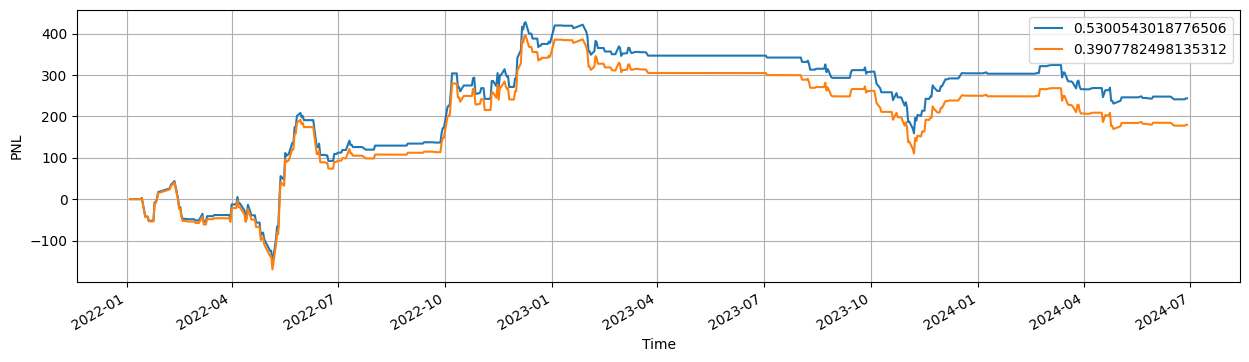

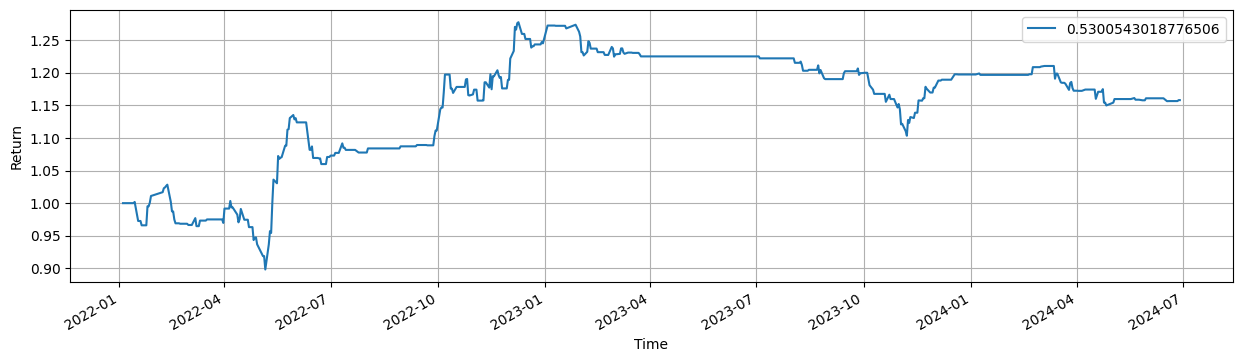

In [12]:
backtesting = F.BacktestInformation(data_VN30_position['time'], data_VN30_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()

Margin: 15.578760628321856
MDD: (158.14650485436897, 0.10156411869063135)

   Total trading quantity: 133
         Profit per trade: 3.7970676691729324
             Total Profit: 505.0
         Profit after fee: 445.5
 Trading quantity per day: 0.215210355987055
 Profit per day after fee: 0.720873786407767
                   Return: 0.1151367567926155
          Profit per year: 179.2805953693495
                  HitRate: 0.5714285714285714
          HitRate per day: 0.18152350081037277


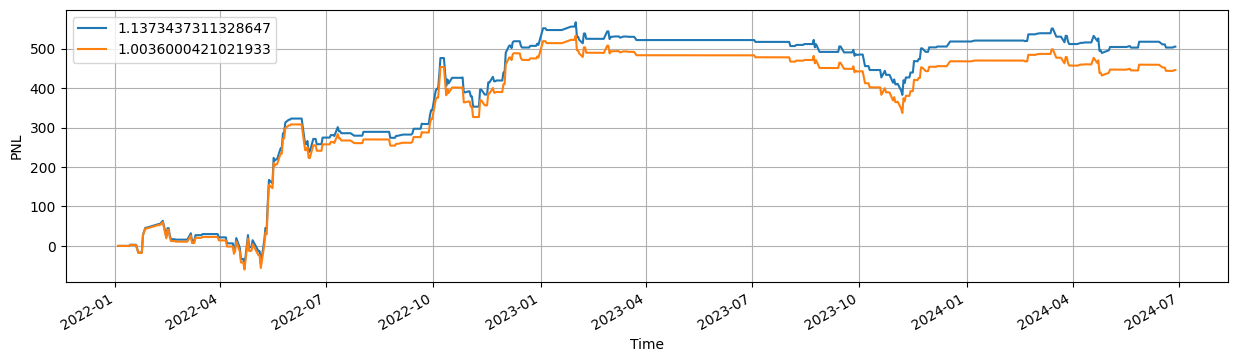

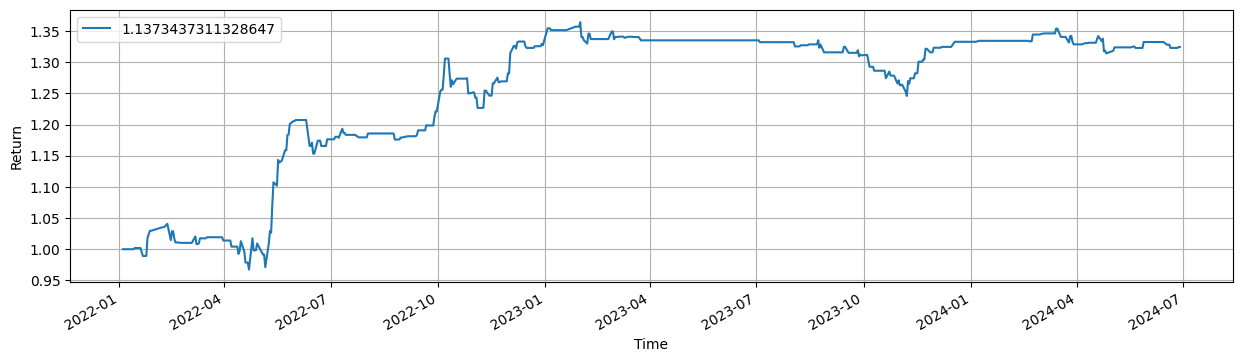

In [13]:
backtesting = F.BacktestInformation(data_VNI_position['time'], data_VNI_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()